# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
cities

['sribne',
 'georgetown',
 'los llanos de aridane',
 'kaitangata',
 'nouakchott',
 'butaritari',
 'adrar',
 'hobart',
 'kieta',
 'bredasdorp',
 'albany',
 'rikitea',
 'vaini',
 'vilyuysk',
 'khatanga',
 'ust-kuyga',
 'mragowo',
 'punta arenas',
 'ushuaia',
 'bonthe',
 'busselton',
 'illoqqortoormiut',
 'baikunthpur',
 'barrow',
 'ngukurr',
 'severo-kurilsk',
 'aykino',
 'smithers',
 'victoria',
 'rocha',
 'campina verde',
 'cabo san lucas',
 'kapaa',
 'gangotri',
 'margate',
 'naze',
 'carutapera',
 'mullaitivu',
 'tuatapere',
 'atuona',
 'belushya guba',
 'kodiak',
 'carrickfergus',
 'cayenne',
 'talas',
 'jamestown',
 'port lincoln',
 'olinda',
 'mataura',
 'grand river south east',
 'homer',
 'talnakh',
 'hilo',
 'vila velha',
 'fort nelson',
 'faanui',
 'saldanha',
 'penzance',
 'oranjemund',
 'port alfred',
 'chicama',
 'caravelas',
 'sola',
 'yellowknife',
 'tasiilaq',
 'cutzamala',
 'dingle',
 'tuktoyaktuk',
 'baracoa',
 'the valley',
 'cabra',
 'ngunguru',
 'tateyama',
 'dikson

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# #try this method if the one below breaks (fallback plan)
# #building base url
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = f"{base_url}appid={api_key}&units={units}&q="

# cityname = []
# cloud = []
# country = []
# date = []
# humid = []
# lat = []
# lng = []
# max_temp = []
# wind_speed = []

# index = 1
# set_index = 1

# print("Begin Data Retrieval")
# print(25*"-")
# for city in cities:
#     try:
#         response = requests.get(query_url + city).json()
#         cityname.append(response['name'])
#         cloud.append(response['clouds']['all'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])
#         humid.append(response['main']['humidity'])
#         lat.append(response['coord']['lat'])
#         lng.append(response['coord']['lon'])
#         max_temp.append(response['main']['temp_max'])
#         wind_speed.append(response['wind']['speed'])
        
#         if index > 50:
#             index = 1
#             set_index += 1
#         else:
#             index += 1
        
#         print(f"Processing Record {index} of Set {set_index} | {city}")
    
#     except (KeyError, IndexError):
#         print("City not found... skipping.")

# print(25*"-")        
# print("Data Retrieval Complete")
# print(25*"-")

In [ ]:
# weather2_df = pd.DataFrame({"City":cityname,"Cloudiness":cloud,"Country":country,
#                            "Date": date, "Humidity": humid,"Lat":lat,
#                            "Lng": lng,"Max Temp": max_temp, "Wind Speed": wind_speed})

In [4]:
###### alternative method
#prints cities that were not found
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

cityname = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
    except (KeyError, IndexError):
        print(f"{city} was not found.")      

illoqqortoormiut was not found.
ngukurr was not found.
gangotri was not found.
mullaitivu was not found.
belushya guba was not found.
grand river south east was not found.
cutzamala was not found.
malwan was not found.
vaitupu was not found.
samusu was not found.
nam tha was not found.
yirol was not found.
palabuhanratu was not found.
ambodifototra was not found.
barentsburg was not found.
taolanaro was not found.
asfi was not found.
burkhala was not found.
louisbourg was not found.
amderma was not found.
wampusirpi was not found.
bojaya was not found.
qui nhon was not found.
dzhusaly was not found.
crab hill was not found.
bolungarvik was not found.
okandja was not found.
mys shmidta was not found.
tonj was not found.
lolua was not found.
andevoranto was not found.
grand centre was not found.
bengkulu was not found.
umzimvubu was not found.
kawana waters was not found.
asau was not found.
gurupa was not found.
saleaula was not found.
cagayan de tawi-tawi was not found.
sorvag was not 

In [5]:
weather_df = pd.DataFrame({"City":cityname})
weather_df.head(10)

,City
0,Sribne
1,Georgetown
2,Los Llanos de Aridane
3,Kaitangata
4,Nouakchott
5,Butaritari
6,Adrar
7,Hobart
8,Kieta
9,Bredasdorp


In [6]:
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sribne,,,,,,,,
1,Georgetown,,,,,,,,
2,Los Llanos de Aridane,,,,,,,,
3,Kaitangata,,,,,,,,
4,Nouakchott,,,,,,,,


In [7]:
#alternative code for API HW
#building base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {"appid": api_key, "units": "imperial"}

set_index = 1
i = 1

print("Begin Data Retrieval")
print(25*"-")
for index, row in weather_df.iterrows():
    
    # get city name from df
    city_name = row["City"]
    
    params['q'] = city_name
    
    #assemble api
    response = requests.get(base_url,params=params).json()

    try:        
        if i > 50:
            set_index += 1
            i = 1
        else:
            i += 1
            
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
       
        print(f"Process Record of {i} of Set {set_index} | {city_name}")

    except (KeyError, IndexError):
        print("City not found... skipping.")
print(25*"-")        
print("Data Retrieval Complete")
print(25*"-")

Begin Data Retrieval
-------------------------
Process Record of 2 of Set 1 | Sribne
Process Record of 3 of Set 1 | Georgetown
Process Record of 4 of Set 1 | Los Llanos de Aridane
Process Record of 5 of Set 1 | Kaitangata
Process Record of 6 of Set 1 | Nouakchott
Process Record of 7 of Set 1 | Butaritari
Process Record of 8 of Set 1 | Adrar
Process Record of 9 of Set 1 | Hobart
Process Record of 10 of Set 1 | Kieta
Process Record of 11 of Set 1 | Bredasdorp
Process Record of 12 of Set 1 | Albany
Process Record of 13 of Set 1 | Rikitea
Process Record of 14 of Set 1 | Vaini
Process Record of 15 of Set 1 | Vilyuysk
Process Record of 16 of Set 1 | Khatanga
Process Record of 17 of Set 1 | Ust-Kuyga
Process Record of 18 of Set 1 | Mragowo
Process Record of 19 of Set 1 | Punta Arenas
Process Record of 20 of Set 1 | Ushuaia
Process Record of 21 of Set 1 | Bonthe
Process Record of 22 of Set 1 | Busselton
Process Record of 23 of Set 1 | Baikunthpur
Process Record of 24 of Set 1 | Barrow
Process 

Process Record of 48 of Set 4 | Imeni Poliny Osipenko
Process Record of 49 of Set 4 | Yar-Sale
Process Record of 50 of Set 4 | Longonjo
Process Record of 51 of Set 4 | Huarmey
Process Record of 1 of Set 5 | Pierre
Process Record of 2 of Set 5 | Edson
Process Record of 3 of Set 5 | Bethel
Process Record of 4 of Set 5 | Mogadishu
Process Record of 5 of Set 5 | Dunedin
Process Record of 6 of Set 5 | Sicuani
Process Record of 7 of Set 5 | Baykit
Process Record of 8 of Set 5 | Magistralnyy
Process Record of 9 of Set 5 | Dire
Process Record of 10 of Set 5 | Talakan
Process Record of 11 of Set 5 | Kabugao
Process Record of 12 of Set 5 | Lensk
Process Record of 13 of Set 5 | Sinop
Process Record of 14 of Set 5 | Kabinda
Process Record of 15 of Set 5 | Uvalde
Process Record of 16 of Set 5 | Belmonte
Process Record of 17 of Set 5 | Davila
Process Record of 18 of Set 5 | Sao Filipe
Process Record of 19 of Set 5 | Fortuna
Process Record of 20 of Set 5 | Thompson
Process Record of 21 of Set 5 | New

Process Record of 48 of Set 8 | Abu Samrah
Process Record of 49 of Set 8 | Zhigansk
Process Record of 50 of Set 8 | Vao
Process Record of 51 of Set 8 | Katsuura
Process Record of 1 of Set 9 | Yulara
Process Record of 2 of Set 9 | Saint-Francois
Process Record of 3 of Set 9 | Paka
Process Record of 4 of Set 9 | Kaniama
Process Record of 5 of Set 9 | Auki
Process Record of 6 of Set 9 | Honningsvag
Process Record of 7 of Set 9 | Polunochnoye
Process Record of 8 of Set 9 | Buraydah
Process Record of 9 of Set 9 | Tecoanapa
Process Record of 10 of Set 9 | Oistins
Process Record of 11 of Set 9 | Necochea
Process Record of 12 of Set 9 | Saint-Augustin
Process Record of 13 of Set 9 | Back Mountain
Process Record of 14 of Set 9 | Piripiri
Process Record of 15 of Set 9 | Diapaga
Process Record of 16 of Set 9 | Alofi
Process Record of 17 of Set 9 | Sept-Iles
Process Record of 18 of Set 9 | Khasan
Process Record of 19 of Set 9 | Natal
Process Record of 20 of Set 9 | Arman
Process Record of 21 of Se

In [8]:
#double checks for cities without weather data
weather_df[weather_df['Country'] == ""]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#export to csv
weather_df.to_csv("weather_data.csv",index=False)

In [10]:
#display
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sribne,74,UA,1570907833,56,50.66,32.92,54.93,15.03
1,Georgetown,40,GY,1570907833,66,6.8,-58.16,91.4,11.41
2,Los Llanos de Aridane,75,ES,1570908183,69,28.66,-17.92,73.4,2.24
3,Kaitangata,99,NZ,1570907834,83,-46.28,169.85,46,14
4,Nouakchott,0,MR,1570908184,15,18.08,-15.98,95,4.7


In [14]:
#retreiving date
from datetime import datetime
date=weather_df.iloc[1,3]

datetime=time.strftime("%D %H:%M", time.localtime(int(date)))
date_str=str(datetime)
print(date_str)

weather_date=date_str.split(" ")[0]
#weatherdate

10/12/19 14:17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

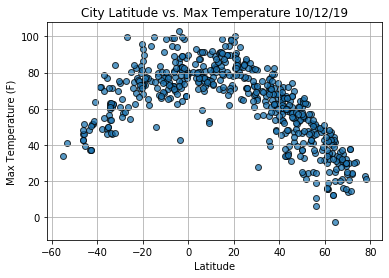

In [15]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(-62, 85)
plt.ylim(min(weather_df['Max Temp'])-10, max(weather_df['Max Temp'])+5)
plt.grid()

plt.title(f"City Latitude vs. Max Temperature {weather_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.savefig("lat_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

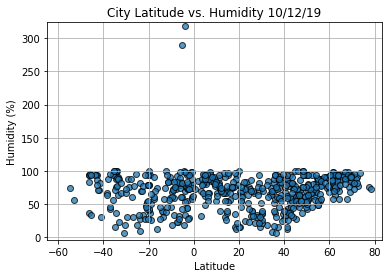

In [16]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Humidity'])-10, max(weather_df['Humidity'])+5)
plt.grid()

plt.title(f"City Latitude vs. Humidity {weather_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.savefig("latv_humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

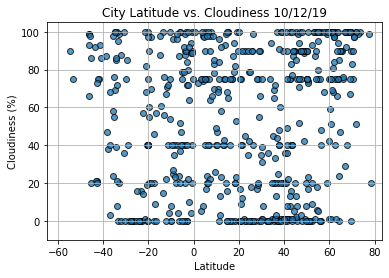

In [18]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Cloudiness'])-10, max(weather_df['Cloudiness'])+5)
plt.title(f"City Latitude vs. Cloudiness {weather_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("latv_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

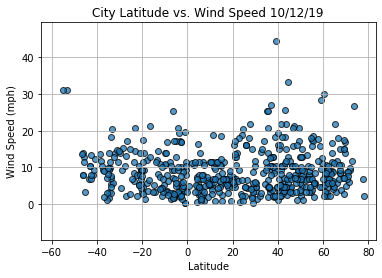

In [19]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.75)

plt.xlim(min(weather_df['Lat'])-10, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Wind Speed'])-10, max(weather_df['Wind Speed'])+5)
plt.title(f"City Latitude vs. Wind Speed {weather_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("latv_wind.png")
plt.show()